#  1. Home owning and interest rate effect in paying Loans 

In [2]:
import pandas as pd
import numpy as np 
import scipy.io
import matplotlib.pyplot as plt 
import seaborn as sb
import statsmodels.api as sm
from matplotlib import rcParams

In [3]:
# load the data with encoding latin-1 as it has some data cannot be encoded
df=pd.read_csv('prosperLoanData.csv')
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


#  2. Content 
* Introduction (Data ,variables and main aim )
* percentage of borrowers repay loans.
* what are the percentage of borrowers who repaying loan.
* effect of owning home in repaying loans.
* the distribution of loan amount and How it affect repaying loan.
* is there any relation between laon amount and the interest rate .
* does the interest rate affects the outcome of the loan status .
* key finding 

# 3. Introduction 
* The data set that has been used to conduct this analysis was the Loan data from prosper it consists of 113,937 loans with 81 variable.
<br>
<br>
* The variables that has been used in this analysis were is a borrowrs home owner (IsBorrowerHomeowner) , the original amount of the loan (LoanOriginalAmount) and (BorrowerRate) .



## 3.1 Motivation 
* Is being economically stable affects the Loan status waeather it will be completed or to be charged off ? for that I will consider owning a home.
<br>
<br>
* Furthermore , I will try to investigate the distribution of the original loan amount as it will lead to higher monthly payment and that may lead to difficulty in repaying the loan . Moreover , the higher loan amount might be associated with higher interest rate so this also need to be investigated .
<br>
<br>
* The outcome was determined from (Loanstatus) which contains the status of the loan . the loan was marked completed if it is status is completed and the chargedoff if its status was chargedoff . Actually , all the past due marked as past due and later dropped from the analysis . it can be treated that any loan past 90 days can be treated as past due but that was not the  case in this analysis .

## 4. what are the percentage of borrowers who Repay Loans  ?

**asumption in the data**
* all the past due regardless of the duration is just past due 

In [5]:
# for me to be easier to perfrom analysis I will change all the past due statues to just Past Due 
# I will create a function for this purpose 
def replace_key_words(df,the_new_keyword,the_name_of_the_column,*argv):
    '''
    this is a function that can be used to replace one or more key words in a specific column in a 
    pandas data frame with new key_word 
    variable :
    df : the pandas dataframe 
    the_new_keyword : the new key word to change all the key words to
    the_name_of_the_column: the name of the column that contains the key word 
    * argv : all the keywords that we want to replace 
    return :
    df with the new information 
    '''
    for key_word in argv:
        df[the_name_of_the_column].replace(key_word,the_new_keyword,inplace=True)
    return(df)
replace_key_words(df,'Past Due','LoanStatus','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)', 'Past Due (31-60 days)','Past Due (>120 days)','Past Due (91-120 days)')
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

In [9]:
# now we need to see this duplicated columns to see what can we do with it 
df_duplicated=df[df.duplicated('ListingKey',keep=False)].sort_values(by='ListingNumber')
# now lets drop the duplicated values 
df=df.drop_duplicates('ListingKey')

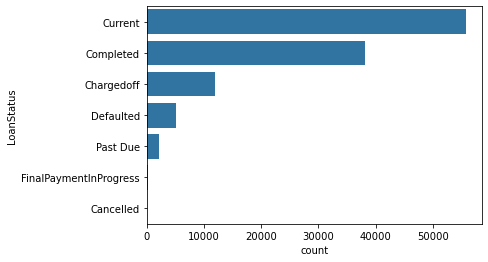

In [8]:
# Now lets explore the loan statues graphically using bar plots
Loan_status_count=df['LoanStatus'].value_counts()
value_order=Loan_status_count.index
# getting the base color from the available colors 
base_color=sb.color_palette()[0]
# bar plot 
sb.countplot(data=df, y='LoanStatus',color=base_color,order=value_order);

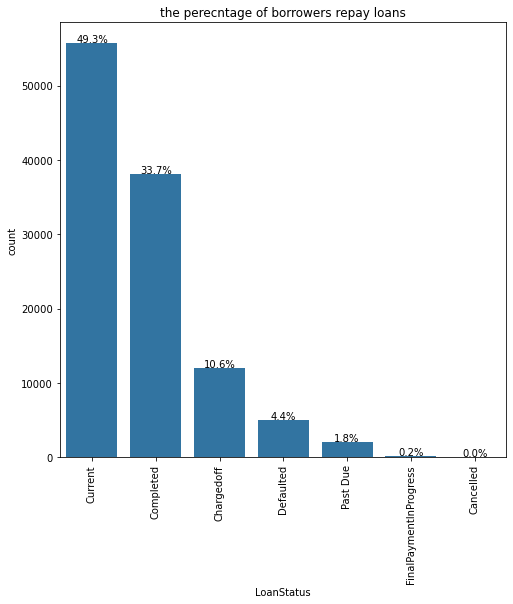

In [9]:
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 8,8
# to give a better understanding we will need the percentage for every statues 
sb.countplot(data=df, x='LoanStatus',color=base_color,order=value_order);
plt.xticks(rotation=90)
plt.title('the perecntage of borrowers repay loans')
# number of all loans is the nsum of all the values in the loan statues column
n_loan=Loan_status_count.sum()
for index,label in enumerate(value_order):
    count = Loan_status_count[label]
    pct_string = '{:0.1f}%'.format(100*count/n_loan)
    plt.text(index, count+100, pct_string, ha ='center', color = 'black')

* The bar plot shows that 49.3 % of our data is still current borrower and due to we have another category of past due Customers almost 1.8% so we know that this 49.3 % is paying back their installemnet .
* only 10.6 % of the data is marked as chrgedoff .The charged off means the company doesnt beileive it will get their money back .

**Now it we will start investigating some variables which we think it might have an effect in the outcome of the loan status** 

## 5 Is owning a home leads to more assurance in repaying ?  

**Throughout the whole analysis we are just interested in two loan status completed and charged of**
* one of the element that can be checked before approving a loan is owning a home . So here the analysis will try to figure out. is owning a home leading to better repay of dept . 
<br>
<br>
* Now we will have to do some Bivariate exploration to investigate the  effectof owning a home in the loan status. we will need to know the perecntage of borrowers who completed/chargedoff from each category in the loan status .

In [10]:
# then lets check if there are any missing values or nan 
df.IsBorrowerHomeowner.isnull().sum()
home_owners_counts=df['IsBorrowerHomeowner'].value_counts()

In [12]:
# using the function in cell 19 to rename the labels 
df2=replace_key_words(df,"homeowner",'IsBorrowerHomeowner',True)
df2=replace_key_words(df2,"not a homeowner",'IsBorrowerHomeowner',False)
# keeping only Two statues in the data 
condition_1=df2['LoanStatus']=='Completed'
condition_2=df2['LoanStatus']=='Chargedoff'
df2=df2.where(condition_1|condition_2)
df2 = df2[df2['LoanStatus'].notna()]

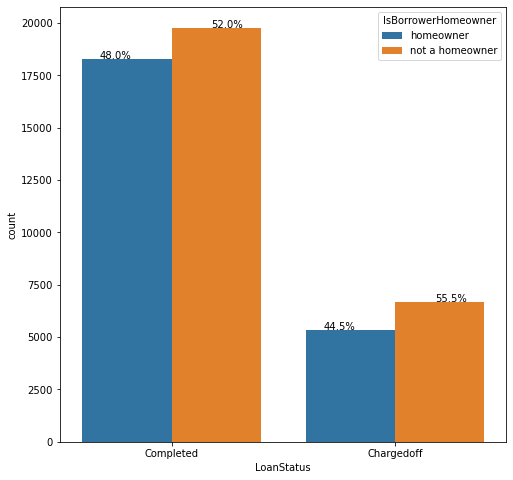

In [13]:
# calcultaing the home owner vs non home owner for each category
plt.figure(figsize = [8, 8])
sb.countplot(data = df2, x = 'LoanStatus', hue = 'IsBorrowerHomeowner')
def plot_percentage_for_multi_bar_plots(df,y_axis_column_name,x_axis_column_name):
    """
    Variables :

    df : the data frame 
    y_axis_column_name: the name of the y axis column 
    x_axis_column_name : the name of the x axis column
    
    Return :
    None 
    """
    x_axis_labels=df[x_axis_column_name].unique()
    y_axis_labels=df[x_axis_column_name].unique()
    n_data=len(x_axis_labels)*len(y_axis_labels)
    # the zero indexing is the in the middle of the first multi bar plots so we have to positioning from 0 
    #(this is position not index )
    index=-1/n_data
    for label in x_axis_labels:
        value_counts=df2[y_axis_column_name].where(df[x_axis_column_name]==label).value_counts()
        value_order=value_counts.index.sort_values()
        n_values=value_counts.sum()
        for label in value_order:
            count = value_counts[label];
            pct_string = '{:0.1f}%'.format(100*count/n_values);
            plt.text(index,count+10,pct_string, ha ='center', color = 'black');
            index +=1/len(y_axis_labels)
plot=plot_percentage_for_multi_bar_plots(df2,'IsBorrowerHomeowner','LoanStatus')

As we can see from this plot 48 % from the people who completed the loan is home owner while 52% where not home owner and this trend is the same also in the people who are charged off . yet we cannot see significance evidence in the effect of being home owner or not in the status of the loan.but we can see that the non home owner percentage is higher in both loan status categories .
<br>
<br>
**to be able to draw more conclusions a regression model might be done to show if there is an effect from being a home owner as it is can be considered as an A/B test case**

In [14]:
## the regression model 
def add_dummy_variable(df,column_name):
    #get the unique value from the column
    dummy_variables=list(df[column_name].unique())
    # sort the variables
    dummy_variables.sort()
    # build a df has a  dummy variable 
    df[dummy_variables]=pd.get_dummies(df[column_name])
    return(df)
# as our variables here are categorial we need to create a dummy variable for the two variables in interest 
df2=add_dummy_variable(df2,'LoanStatus')
df2=add_dummy_variable(df2,'IsBorrowerHomeowner')

## using logistic regression because we have categorial variables 

def build_alinear_model_using_sm_Logit(df,y_predicted_values,*argv):
    """
    y_predicted_value : the predicted value 
    *argv: all the X variables NOT INCLUDING intercept the function add it automatically 
    return : result of the model 
    """
    df['intercept']=1
    model=sm.Logit(df[y_predicted_values],df[['intercept',*argv]])
    result=model.fit()
    return(result)
result=(build_alinear_model_using_sm_Logit(df2,'Completed',"homeowner"))
result.summary()

Optimization terminated successfully.
         Current function value: 0.208161
         Iterations 5


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Completed   No. Observations:                50053
Model:                          Logit   Df Residuals:                    50051
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 May 2021   Pseudo R-squ.:                     inf
Time:                        21:05:06   Log-Likelihood:                -10419.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0887      0.014     76.855      0.000       1.061       1.116
homeowner      0.1433      0.021      6.808      0.000       0.102       0.185
==============================================================================
"""

## 5.1 Regression analysis 
The variable that I am most interested in my regression model is the p value which shows how statisticaly significant the effect of the coefficient in the regression modelin the outcome of the analysis . so zero p value shows that it is has significant effect while any non zero value indicate that the coeffiecient has no significant effect in the outcome of the analysis . 
<br>
<br>
The regression model shows that the p value associated with homeowner value is zero  and that means being home owner has an effect in weather or not the status of your loan will be completed . the surprise here which still in the same page as what the bar plot showed earlier is that it leads to decrease in the number of the borrowers with the completed status .

## 6 Does the Loan amount  affects the repaying of the loan ?

* one of things that may affect if a person is able to pay back the dept is the amount he /she should pay so we will investigate the original loan amount distribution this can be done using bar plot.

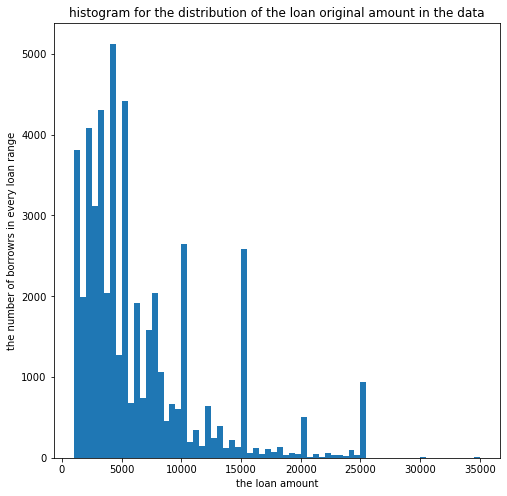

In [15]:
# histogram for the 'LoanOriginalAmount'
plt.figure(figsize = [8, 8])
bins=np.arange(df2['LoanOriginalAmount'].min(),df2['LoanOriginalAmount'].max()+500,500)
plt.hist(data=df2,x='LoanOriginalAmount',bins=bins);
plt.xlabel('the loan amount');
plt.ylabel('the number of borrowrs in every loan range');
plt.title('histogram for the distribution of the loan original amount in the data');

* As we can see from this histogram this data is left skewed and that means the largest portion of the borrowers has borrowed small amount of cash .
<br>
<br>
* Then we will need to see the mean ,max and minimum of the original loan amount in relation to the two loan status for that I will use violit plot and box plot 

In [16]:
def box_plot_violit_plot(df,x,y):
    plt.figure(figsize = [16, 8])
    base_color=sb.color_palette()[0]
    plt.subplot(1, 2, 1)
    sb.violinplot(data=df,x=x, y=y,color=base_color)
    plt.title('violit plot for the distribution of '+y+' with Loan status');
    # RIGHT plot: box plot
    plt.subplot(1, 2, 2)
    sb.boxplot(data=df,x=x, y=y,color=base_color)
    plt.title('box plot for the distribution of '+y+' with Loan status');

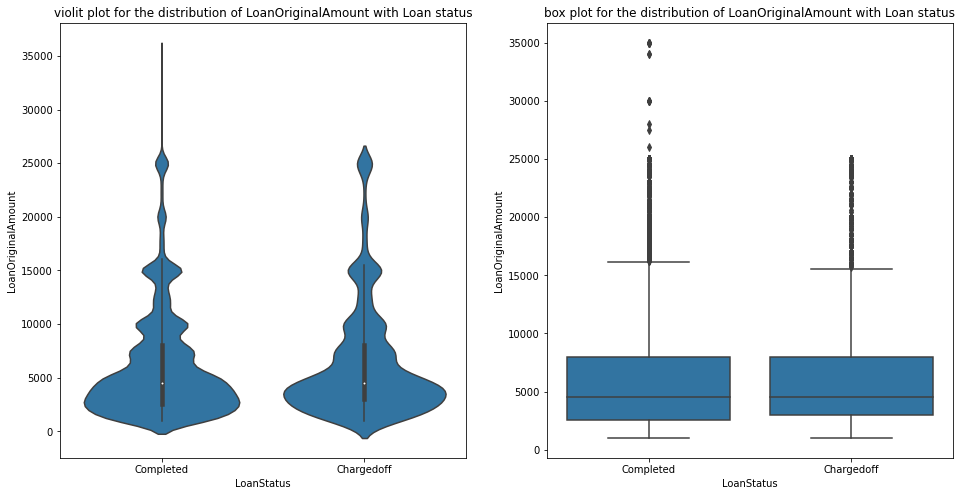

In [17]:
box_plot_violit_plot(df2,'LoanStatus','LoanOriginalAmount')

Looking at this two box plots we can see they are almost identical even the violin plot have the same shape which shows two things 
<br>
1) due to the large area of the violit plot in the area below 5000 in both categories so we know that ,the most majority of the borrowers has borrowed less than 5000 dollar . 
<br>
2) the Loan amount has no effect yet in weather or not the Loan status become completed or charged off. that conclusion came from the box plot have the same shape in both categories . and that will lead us to start investigate a third relationship a scatter plot between the loan amount and the interest rate to see if it has effect in the interest rate. 

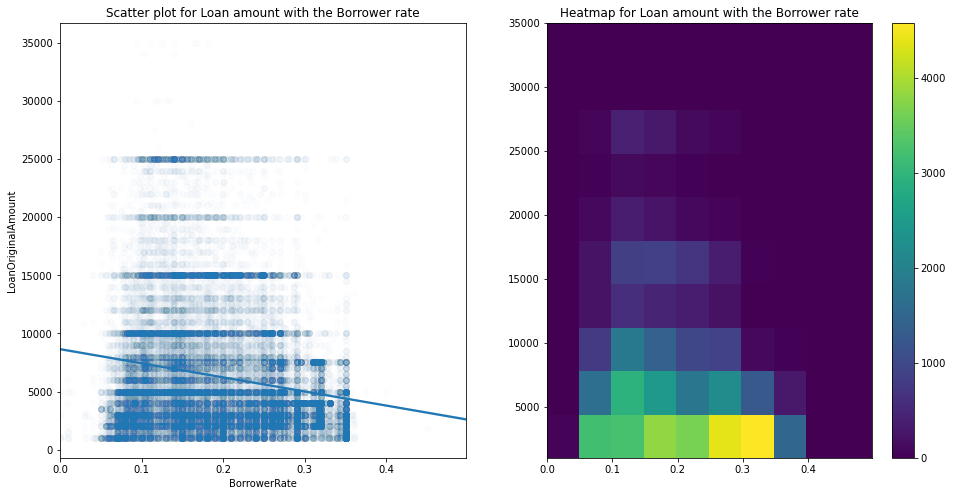

In [18]:
# scatter plot 
plt.figure(figsize = [16, 8])
plt.subplot(1, 2, 1)
sb.regplot(data = df2,  x = 'BorrowerRate', y= 'LoanOriginalAmount',scatter_kws={'alpha':1/100});
plt.title('Scatter plot for Loan amount with the Borrower rate')
# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df2,   x = 'BorrowerRate', y= 'LoanOriginalAmount')
plt.colorbar()
plt.title('Heatmap for Loan amount with the Borrower rate');

 looking at this scatter plot we cannot say the Loan amount has any thing to do with the interest rate . and looking at the heat map we can draw the same conclusion that original loan amounts which not exceeding the 5000 dollar are the major part of the data and the interest rate doesnt change with the loan amount . 
 
 * The next thing is to investigate the interest rate by it`s own to see if it has an effect in the outcome of the loan status

## 7 The  effect of the interest rate in repaying the dept 

**Now we need to investigate another variable and due to this variable is numerical we will need to use another kind of plots to investigate it as univariate and as bivariate exploration . This variable is the interest rate associated with the borrower** 
* we will use histogram to show the distribution of the interest rate in our data 
* we will have box plots to investigate it`s relation with the status of the loan 

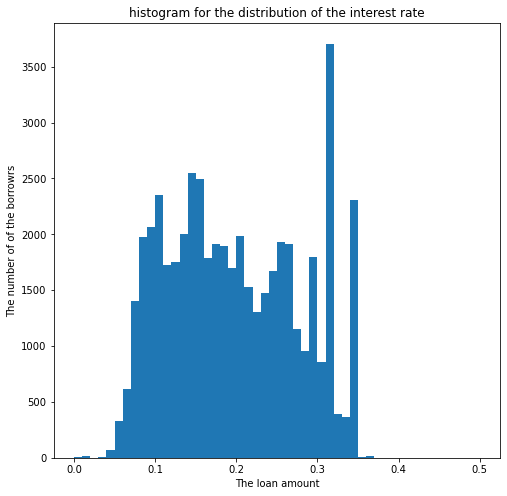

In [19]:
# histogram for the 'BorrowRate'
plt.figure(figsize = [8, 8])
bins=np.arange(df2['BorrowerRate'].min(),df2['BorrowerRate'].max()+.01,.01)
plt.hist(data=df2,x='BorrowerRate',bins=bins);
plt.xlabel('The loan amount');
plt.ylabel('The number of of the borrowrs');
plt.title('histogram for the distribution of the interest rate');

Actually we cannot draw so  many conclusions from this univariate exploration of the data .the data almost distributed equally between the very low interst and the very high interest despite the facts that we have two big bins at 35 % rate  .but we can reach a conclusion the lowest interest rate is in 5% and the highest interest rate is in range 35% which . but the borrowers distribution looks normal if we excluded this two noise bins at 33% and 35 % approximatly.

**The better way to investigate this variable is using bi variant exploration to see how the percentage rate affected the loan status** . We can do so using the box plot as it will give us insight regarding the mean of every category ,the maximum and minimum values .

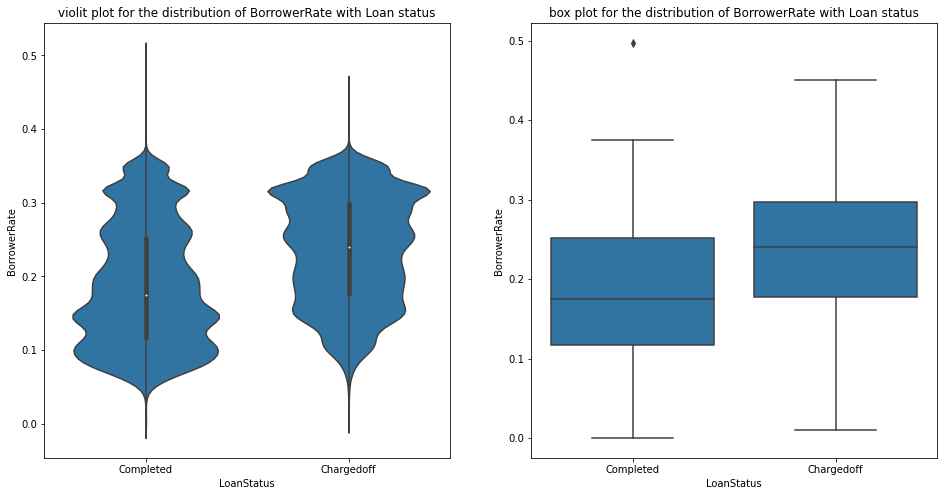

In [20]:
# first we need to check if there are any null values in the IncomeRange
box_plot_violit_plot(df2,'LoanStatus','BorrowerRate')

Lets look at this box plot to see what did we get here:
* the mean of the interest rate of the borrowers who finished /completed the loan is lower than the avearage of the customer who was marked as chargedoff significantly.
* the variation in the data in the charged off borrowrs looks bigger than the one in the completed status borrowrs . yet , we cannot draw more conclusions from this box plot so we will need the violit plots to show us more regarding the distribution of the data .
* when looking at the violin plot we can see that the distribution of the borrowers covers the same interest in both categories . also we can say that from the violin plot ,in the completed loan status more borrowers is in the lower rate interest while the opposite can be said regarding the chargedoff customer . it looks like the violin in the right is upside down of the violin in the left . which shows how siginificant the Rate affaect the status of the Loan 

**now what will we get from investigating the loan status with the loan original amount and the interest rate ?** 
* The type of plot which will show our data in a good way will be the heat map to show where most of our points lie for nevery group 

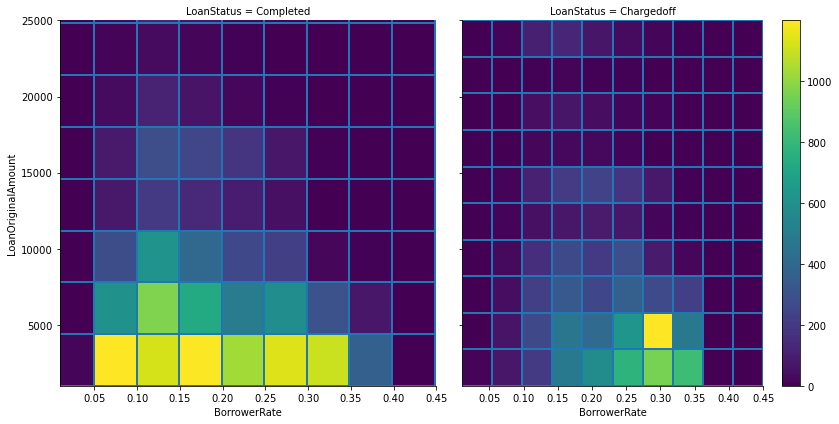

In [16]:
g = sb.FacetGrid(data = df2, col = 'LoanStatus', size = 6)
g.map(plt.hist2d,'BorrowerRate', 'LoanOriginalAmount');
plt.colorbar();

* Investigating this Two plots is really intersting as we can see in the right plot which show the category of the borrowrs who completed the loan ,the highest portion of people lie in the low interest almost 10% interest with Loan amount is very less almost 5000 so the total payment back doesnt differ so much from the original amount which was received from the borrower.

* investigating the borrowers who was not able to repay the loan showed that the highest portion was in the category with very high interest 30 to 35 % almost and while the Loan original amount considered yet not big but this interest rate has significant effect in the ability of the borrower to pay back the loan .

# 8. Summary of the finding 

* investigating being a home owner leads to intersting discovery . being a home owner didnt lead to best repaying of the loan.but the analysis shows that being a home owner leads to more probability that your loan will not be paid .

* the key finding here is the relation between the interest rate and mark the loan as charged off . The more the interest rate increases the more it is most likely the loan will be marked as chargedoff . This can be seen from the box plot which shows  the relation between the interest rate and the Loan status category and from the heat map which shows multivariate relation between (the loan original value , the interest rate , the loan status ) . 

* 33.7 % of the borrowers pay back their dept while only 10.6 % has been marked as charged off (there are 50% of the provided data is current loaners so we cannot use this data or the past due one in the analysis .

* one of the finding is that the value of the loans in this data lie in the range below 5000 dollar . this can be seen in the histogram that shows the distribution of the original loan amount among borrowers.